Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [52]:
DATA_FOLDER = 'competitive-data-science-final-project/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
print(transactions.shape)
print(items.shape)

print(item_categories.shape)
print(shops.shape)

(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)


In [53]:
transactions.head()
#items.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
d = transactions.date

In [7]:
dstripeed = d.str.split('.')

In [8]:
dstripeed

0          [02, 01, 2013]
1          [03, 01, 2013]
2          [05, 01, 2013]
3          [06, 01, 2013]
4          [15, 01, 2013]
                ...      
2935844    [10, 10, 2015]
2935845    [09, 10, 2015]
2935846    [14, 10, 2015]
2935847    [22, 10, 2015]
2935848    [03, 10, 2015]
Name: date, Length: 2935849, dtype: object

In [46]:
did = pd.DatetimeIndex(transactions.date, dayfirst=True)

In [47]:
did

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-05', '2013-01-06',
               '2013-01-15', '2013-01-10', '2013-01-02', '2013-01-04',
               '2013-01-11', '2013-01-03',
               ...
               '2015-10-24', '2015-10-31', '2015-10-11', '2015-10-10',
               '2015-10-09', '2015-10-10', '2015-10-09', '2015-10-14',
               '2015-10-22', '2015-10-03'],
              dtype='datetime64[ns]', name='date', length=2935849, freq=None)

In [48]:
did.day

Int64Index([ 2,  3,  5,  6, 15, 10,  2,  4, 11,  3,
            ...
            24, 31, 11, 10,  9, 10,  9, 14, 22,  3],
           dtype='int64', name='date', length=2935849)

In [49]:
did.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
           dtype='int64', name='date', length=2935849)

In [50]:
did.year

Int64Index([2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
            ...
            2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
           dtype='int64', name='date', length=2935849)

In [54]:
transactions1 = transactions.copy()

In [55]:
transactions1['day'] = did.day

In [56]:
transactions1['month'] = did.month

In [57]:
transactions1['year'] = did.year

In [59]:
transactions1

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013
...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,10,10,2015
2935845,09.10.2015,33,25,7460,299.00,1.0,9,10,2015
2935846,14.10.2015,33,25,7459,349.00,1.0,14,10,2015
2935847,22.10.2015,33,25,7440,299.00,1.0,22,10,2015


In [62]:
any(transactions1.month >12)

False

In [12]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [13]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [14]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [63]:
transactions1.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year'],
      dtype='object')

In [123]:
transactions1['revenue'] = transactions1.item_price * transactions1.item_cnt_day

In [124]:
transactions1.loc[(transactions1.year == 2014) & (transactions1.month == 9)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,revenue
1953691,24.09.2014,20,5,1039,899.0,1.0,24,9,2014,899.0
1953692,27.09.2014,20,5,1015,449.0,1.0,27,9,2014,449.0
1953693,07.09.2014,20,5,1329,399.0,1.0,7,9,2014,399.0
1953694,27.09.2014,20,5,984,399.0,1.0,27,9,2014,399.0
1953695,08.09.2014,20,5,984,399.0,1.0,8,9,2014,399.0
...,...,...,...,...,...,...,...,...,...,...
2026843,02.09.2014,20,56,13605,299.0,1.0,2,9,2014,299.0
2026844,22.09.2014,20,56,13605,299.0,1.0,22,9,2014,299.0
2026845,19.09.2014,20,56,12833,399.0,1.0,19,9,2014,399.0
2026846,28.09.2014,20,54,2887,199.0,1.0,28,9,2014,199.0


In [126]:
max_rev = transactions1.loc[(transactions1.year == 2014) & (transactions1.month == 9)].groupby('shop_id').revenue.sum().max()

In [127]:
max_rev

7982852.199999956

In [129]:
round(max_rev, 4)

7982852.2

In [130]:
# YOUR CODE GOES HERE

max_revenue = 7982852.2  # transactions1.loc[(transactions1.year == 2014) & (transactions1.month == 9)].groupby('shop_id').item_cnt_day.sum().max()                                  # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [132]:
left = transactions1.set_index('item_id')
right = items.set_index('item_id')
joint = left.join(right, lsuffix = '_tr', rsuffix = '_it')

In [133]:
joint

,date,date_block_num,shop_id,item_price,item_cnt_day,day,month,year,revenue,item_name,item_category_id
item_id,,,,,,,,,,,
0,01.09.2014,20,54,58.0,1.0,1,9,2014,58.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40
1,04.04.2014,15,55,4490.0,1.0,4,4,2014,4490.0,!ABBYY FineReader 12 Professional Edition Full...,76
1,02.04.2014,15,55,4490.0,1.0,2,4,2014,4490.0,!ABBYY FineReader 12 Professional Edition Full...,76
1,06.07.2014,18,55,4490.0,1.0,6,7,2014,4490.0,!ABBYY FineReader 12 Professional Edition Full...,76
1,04.08.2014,19,55,4490.0,1.0,4,8,2014,4490.0,!ABBYY FineReader 12 Professional Edition Full...,76
...,...,...,...,...,...,...,...,...,...,...,...
22168,02.02.2013,1,42,799.0,1.0,2,2,2013,799.0,Яйцо для Little Inu,62
22168,17.02.2013,1,16,799.0,1.0,17,2,2013,799.0,Яйцо для Little Inu,62
22168,08.03.2013,2,43,798.5,1.0,8,3,2013,798.5,Яйцо для Little Inu,62


In [134]:
joint2 = joint.set_index('item_category_id')

In [135]:
joint2.loc[joint2.month.isin([6,7,8]) & (joint2.year==2014)]

,date,date_block_num,shop_id,item_price,item_cnt_day,day,month,year,revenue,item_name
item_category_id,,,,,,,,,,
76,06.07.2014,18,55,4490.0,1.0,6,7,2014,4490.0,!ABBYY FineReader 12 Professional Edition Full...
76,04.08.2014,19,55,4490.0,1.0,4,8,2014,4490.0,!ABBYY FineReader 12 Professional Edition Full...
40,24.08.2014,19,54,58.0,1.0,24,8,2014,58.0,***В ЛУЧАХ СЛАВЫ (UNV) D
40,05.07.2014,18,54,100.0,1.0,5,7,2014,100.0,***ГОЛУБАЯ ВОЛНА (Univ) D
40,26.08.2014,19,54,58.0,1.0,26,8,2014,58.0,***ГОЛУБАЯ ВОЛНА (Univ) D
...,...,...,...,...,...,...,...,...,...,...
49,31.08.2014,19,27,299.0,1.0,31,8,2014,299.0,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...
49,24.08.2014,19,27,299.0,1.0,24,8,2014,299.0,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...
49,01.08.2014,19,27,299.0,1.0,1,8,2014,299.0,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...


In [136]:
joint2.loc[joint2.month.isin([6,7,8]) & (joint2.year==2014)].groupby('item_category_id').revenue.sum().idxmax()#.sort_values(ascending = False)

20

In [137]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 20 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [84]:
transactions1.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013


In [86]:
def unique(row):
    return len(set(row.item_price))

In [90]:
sum((transactions1.groupby('item_id').apply(unique) == 1)[:5])

4

In [91]:
sum((transactions1.groupby('item_id').apply(unique) == 1))

5926

In [92]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926   # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [95]:
transactions1.loc[(transactions1.shop_id == 25) & (transactions1.month==12) & (transactions1.year==2014)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
2295837,14.12.2014,23,25,21752,399.0,1.0,14,12,2014
2295838,13.12.2014,23,25,21752,399.0,3.0,13,12,2014
2295839,26.12.2014,23,25,21733,149.0,1.0,26,12,2014
2295840,31.12.2014,23,25,21732,149.0,1.0,31,12,2014
2295841,30.12.2014,23,25,21726,149.0,1.0,30,12,2014
...,...,...,...,...,...,...,...,...,...
2323418,11.12.2014,23,25,5037,2599.0,1.0,11,12,2014
2323419,28.12.2014,23,25,5037,1999.0,2.0,28,12,2014
2323420,03.12.2014,23,25,5038,2999.0,1.0,3,12,2014
2323421,06.12.2014,23,25,5033,1199.0,1.0,6,12,2014


In [96]:
df2 = transactions1.loc[(transactions1.shop_id == 25) & (transactions1.month==12) & (transactions1.year==2014)]

In [106]:
sum(df2.item_cnt_day < 0)

13

In [107]:
ser1 = df2.groupby('day').item_cnt_day.sum()

In [110]:
ser1

day
1      153.0
2      169.0
3      195.0
4      164.0
5      300.0
6      350.0
7      325.0
8      209.0
9      204.0
10     143.0
11     214.0
12     297.0
13     432.0
14     305.0
15     225.0
16     192.0
17     285.0
18     325.0
19     418.0
20     579.0
21     379.0
22     318.0
23     371.0
24     433.0
25     505.0
26     620.0
27     743.0
28     662.0
30    1966.0
31     776.0
Name: item_cnt_day, dtype: float64

In [113]:
ser1.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31],
           dtype='int64', name='day')

In [115]:
ser1.values

array([ 153.,  169.,  195.,  164.,  300.,  350.,  325.,  209.,  204.,
        143.,  214.,  297.,  432.,  305.,  225.,  192.,  285.,  325.,
        418.,  579.,  379.,  318.,  371.,  433.,  505.,  620.,  743.,
        662., 1966.,  776.])

In [116]:
var  = np.var(ser1.values, ddof = 1)

In [117]:
var

117167.70229885059

In [118]:
np.sqrt(var)

342.29768082598895

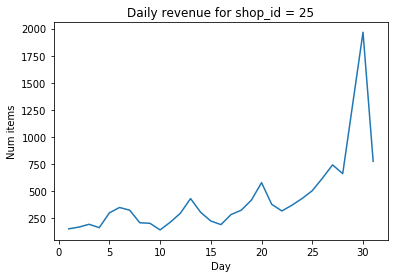

Current answer for task total_num_items_sold_var is: 117167.7023


In [119]:
shop_id = 25

total_num_items_sold = ser1.values# YOUR CODE GOES HERE
days = ser1.index# YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = 117167.7023    #     9885059 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [138]:
STUDENT_EMAIL = 'akshaybsathe@gmail.com'       # EMAIL HERE
STUDENT_TOKEN = 'EnaHkc3MfK2gyHbg'   # TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.7023


In [139]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)